In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pathlib
import itertools
import glob
import json
import seaborn as sns
from scipy.stats import gaussian_kde

In [3]:
import monalysa
from monalysa import movements
from monalysa import quality

In [4]:
# Define the font family and size
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.weight'] = 'light'  # Use 'light' font weight

In [5]:
base_fig_dir = pathlib.Path.cwd().parent / "figures"

## Continuitiy of SPARC and LDLJ measures: Change in submovement amplitude

In [6]:
# Generate of a series of movements with two submovements and varying amplitude.
dt = 0.001
fs = 1/dt
t = np.arange(0, 3.0, dt)
v = movements.mjt_discrete_movement(amp=1, dur=1., loc=0.5, time=t, data_type='vel')

# Generate a series of movements of varying amplitude
u = [movements.mjt_discrete_movement(amp=_uamp, dur=1., loc=2.5, time=t, data_type='vel')
     for _uamp in np.arange(0.0, 1.0, 0.001)]

In [7]:
# Compute the LDLJ smoothness for the combined movements.
vel_th = 0.0001
ldlj_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    ldlj_smooth[i] = quality.smoothness.log_dimensionless_jerk(
        w[strt_inx:stp_inx],
        fs=fs,
        data_type="vel"
    )

In [8]:
# Compute the SPARC smoothness for the combined movements.
sparc_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    sparc_smooth[i] = quality.smoothness.sparc(w[strt_inx:stp_inx], fs=fs)[0]

In [9]:
inx = [0, 100, 500, 999]
ws = [v + u[i] for i in inx]
ldlj_ws = [quality.smoothness.log_dimensionless_jerk(w, fs=fs, data_type="vel") for w in ws]
sparc_ws = [quality.smoothness.sparc(w, fs=fs)[0] for w in ws]

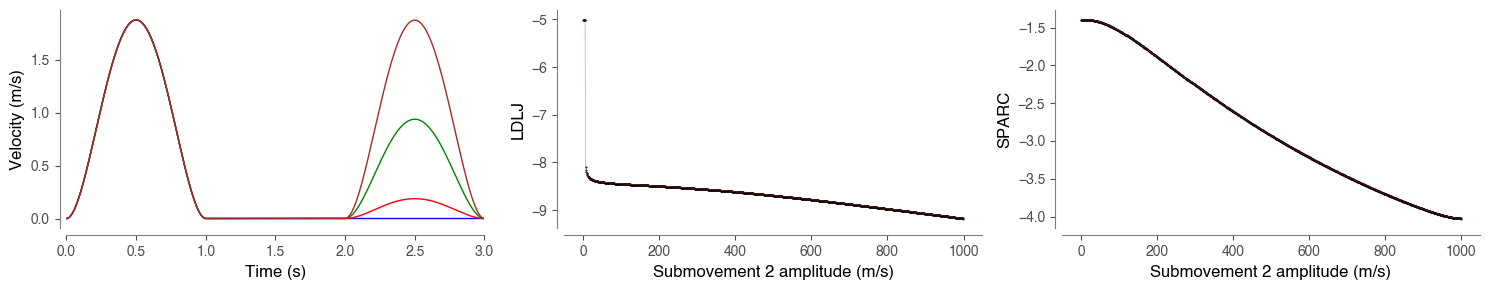

In [10]:
fig = plt.figure(figsize=(15, 3))
# Plot of different movements profiles.
ax = fig.add_subplot(131)
ax.plot(t, ws[0], lw=1, color="blue")
ax.plot(t, ws[1], lw=1, color="red")
ax.plot(t, ws[2], lw=1, color="green")
ax.plot(t, ws[3], lw=1, color="brown")
ax.set_xlim(0, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Velocity (m/s)", fontsize=12)
              
# LDLJ smoothness
ax = fig.add_subplot(132)
ax.plot(ldlj_smooth[::], '.', markersize=1, color="black")
ax.plot(ldlj_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("LDLJ", fontsize=12)

# SPARC smoothness
ax = fig.add_subplot(133)
ax.plot(sparc_smooth[::], '.', markersize=1, color="black")
ax.plot(sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()

## Continuitiy of SPARC and LDLJ measures: Change in inter-submovement interval

In [11]:
# Generate of a series of movements with two submovements and varying amplitude.
dt = 0.001
fs = 1/dt
t = np.arange(0, 3.0, dt)
v = movements.mjt_discrete_movement(amp=1, dur=1., loc=0.5, time=t, data_type='vel')

# Generate a series of movements of varying amplitude
dts = 0.1
ts1, ts2 = 0.5, 2.5
u = [movements.mjt_discrete_movement(amp=1., dur=1., loc=_uloc, time=t, data_type='vel')
     for _uloc in np.arange(ts1, ts2, dts)]

In [12]:
# Compute the LDLJ smoothness for the combined movements.
vel_th = 0.0001
ldlj_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    ldlj_smooth[i] = quality.smoothness.log_dimensionless_jerk(
        w[strt_inx:stp_inx],
        fs=fs,
        data_type="vel"
    )

In [13]:
# Compute the SPARC smoothness for the combined movements.
sparc_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    sparc_smooth[i] = quality.smoothness.sparc(w[strt_inx:stp_inx], fs=fs)[0]

In [14]:
inx = [0, 100, 500, 999]
inx = [0, 1, 5, 9]
ws = [v + u[i] for i in inx]
ldlj_ws = [quality.smoothness.log_dimensionless_jerk(w, fs=fs, data_type="vel") for w in ws]
sparc_ws = [quality.smoothness.sparc(w, fs=fs)[0] for w in ws]

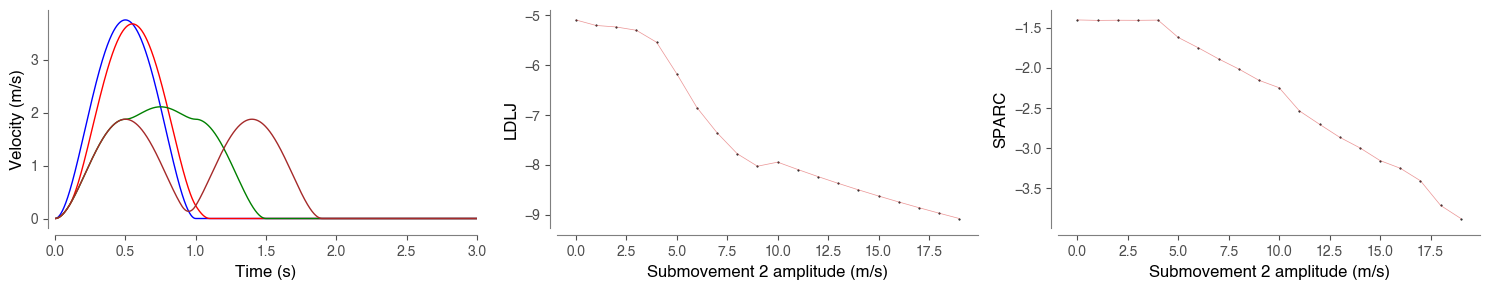

In [15]:
fig = plt.figure(figsize=(15, 3))
# Plot of different movements profiles.
ax = fig.add_subplot(131)
ax.plot(t, ws[0], lw=1, color="blue")
ax.plot(t, ws[1], lw=1, color="red")
ax.plot(t, ws[2], lw=1, color="green")
ax.plot(t, ws[3], lw=1, color="brown")
ax.set_xlim(0, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Velocity (m/s)", fontsize=12)
              
# LDLJ smoothness
ax = fig.add_subplot(132)
ax.plot(ldlj_smooth[::], '.', markersize=1, color="black")
ax.plot(ldlj_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("LDLJ", fontsize=12)

# SPARC smoothness
ax = fig.add_subplot(133)
ax.plot(sparc_smooth[::], '.', markersize=1, color="black")
ax.plot(sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()

## Continuitiy of SPARC and LDLJ measures: Change in inter-submovement interval

In [38]:
# Generate of a series of movements with two submovements and varying amplitude.
dt = 0.001
fs = 1/dt
t = np.arange(0, 3.0, dt)
v = movements.gaussian_discrete_movement(amp=1, dur=1., loc=0.5, time=t, data_type='vel')

# Generate a series of movements of varying inter-submovement duration
dts = 0.1
ts1, ts2 = 0.5, 2.5
tsvals = np.arange(ts1, ts2, dts)
u = [movements.gaussian_discrete_movement(amp=1., dur=1., loc=_uloc, time=t, data_type='vel')
     for _uloc in tsvals]

In [39]:
# Compute the LDLJ smoothness for the combined movements.
vel_th = 0.0001
ldlj_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    ldlj_smooth[i] = quality.smoothness.log_dimensionless_jerk(
        w[strt_inx:stp_inx],
        fs=fs,
        data_type="vel"
    )

In [40]:
# Compute the SPARC smoothness for the combined movements.
sparc_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    sparc_smooth[i] = quality.smoothness.sparc(w[strt_inx:stp_inx], fs=fs)[0]

In [41]:
inx = [0, 100, 500, 999]
inx = [0, 10, 50, 99]
inx = [0, 1, 5, 9]
ws = [v + u[i] for i in inx]
ldlj_ws = [quality.smoothness.log_dimensionless_jerk(w, fs=fs, data_type="vel") for w in ws]
sparc_ws = [quality.smoothness.sparc(w, fs=fs)[0] for w in ws]

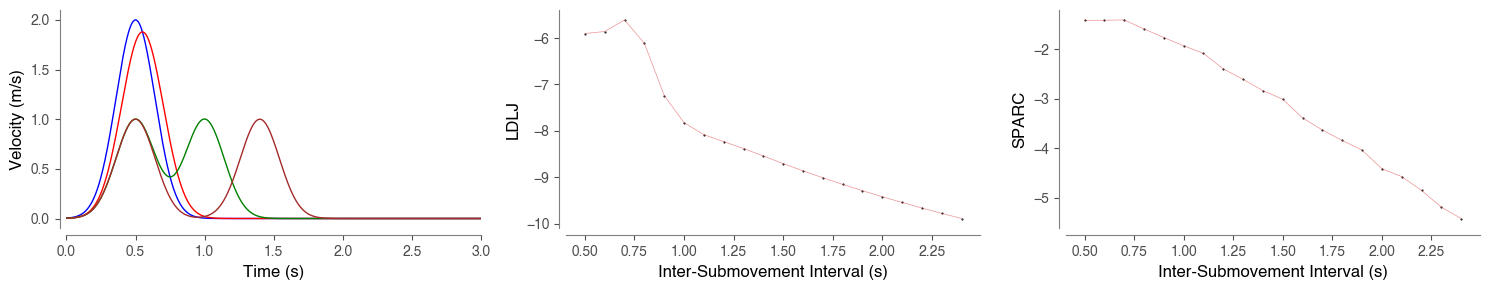

In [42]:
fig = plt.figure(figsize=(15, 3))
# Plot of different movements profiles.
ax = fig.add_subplot(131)
ax.plot(t, ws[0], lw=1, color="blue")
ax.plot(t, ws[1], lw=1, color="red")
ax.plot(t, ws[2], lw=1, color="green")
ax.plot(t, ws[3], lw=1, color="brown")
ax.set_xlim(0, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Velocity (m/s)", fontsize=12)
              
# LDLJ smoothness
ax = fig.add_subplot(132)
ax.plot(tsvals, ldlj_smooth[::], '.', markersize=1, color="black")
ax.plot(tsvals, ldlj_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Inter-Submovement Interval (s)", fontsize=12)
ax.set_ylabel("LDLJ", fontsize=12)

# SPARC smoothness
ax = fig.add_subplot(133)
ax.plot(tsvals, sparc_smooth[::], '.', markersize=1, color="black")
ax.plot(tsvals, sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Inter-Submovement Interval (s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()

In [1]:
fig = plt.figure(figsize=(15, 3))
# Plot of different movements profiles.
ax = fig.add_subplot(131)
ax.plot(t, ws[0], lw=1, color="blue")
ax.plot(t, ws[1], lw=1, color="red")
ax.plot(t, ws[2], lw=1, color="green")
ax.plot(t, ws[3], lw=1, color="brown")
ax.set_xlim(0, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Velocity (m/s)", fontsize=12)
              
# LDLJ smoothness
ax = fig.add_subplot(132)
ax.plot(tsvals, ldlj_smooth[::], '.', markersize=1, color="black")
ax.plot(tsvals, ldlj_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Inter-Submovement Interval (s)", fontsize=12)
ax.set_ylabel("LDLJ", fontsize=12)

# SPARC smoothness
ax = fig.add_subplot(133)
ax.plot(tsvals, sparc_smooth[::], '.', markersize=1, color="black")
ax.plot(tsvals, sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
# ax.set_xlim(1.15, 1.25)
# ax.set_ylim(-2.6, -2.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Inter-Submovement Interval (s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()

NameError: name 'plt' is not defined

In [102]:
# Generate of a series of movements with two submovements and varying amplitude.
dt = 0.001
fs = 1/dt
t = np.arange(0, 3.0, dt)
v = movements.gaussian_discrete_movement(amp=1, dur=1., loc=0.5, time=t, data_type='vel')

# Generate a series of movements of varying amplitude
# dts = 1e-6
# ts1, ts2 = 1.177, 1.178
# tsvals = np.arange(ts1, ts2, dts)
# u = [movements.gaussian_discrete_movement(amp=1., dur=1., loc=_uloc, time=t, data_type='vel')
#      for _uloc in tsvals]
dts = 1e-8
ts_disc = 1.1776
ts1, ts2 = ts_disc - 1e-4, ts_disc + 1e-4
tsvals = np.arange(ts1, ts2, dts)
u = [movements.gaussian_discrete_movement(amp=1., dur=1., loc=_uloc, time=t, data_type='vel')
     for _uloc in tsvals]

In [103]:
# Compute the SPARC smoothness for the combined movements.
sparc_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    sparc_smooth[i] = quality.smoothness.sparc(w[strt_inx:stp_inx], fs=fs)[0]

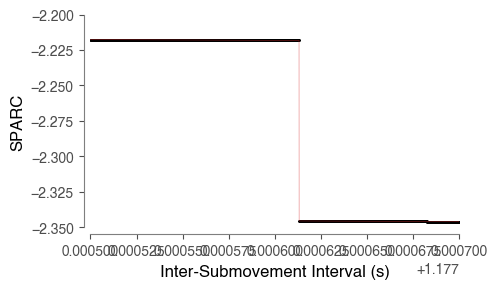

In [104]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.plot(tsvals, sparc_smooth[::], '.', markersize=0.5, color="black")
ax.plot(tsvals, sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.set_xlim(ts1, ts2)
ax.set_ylim(-2.35, -2.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Inter-Submovement Interval (s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()

In [90]:
np.where(np.diff(sparc_smooth) == np.min(np.diff(sparc_smooth)))

(array([613]),)

In [94]:
tsvals[614]

1.1776139999999495

In [95]:
sparc_smooth[612], sparc_smooth[613], sparc_smooth[614], sparc_smooth[615]

(-2.2183005778618496,
 -2.218306468190482,
 -2.3454333396248983,
 -2.3454389695350475)